In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_row",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')


In [8]:
df=pd.read_csv("titanic-training-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S


In [10]:
# passengers are survived or not -categorical-classification-logistic regression

In [11]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.shape

(891, 12)

# replacing null values in numerical columns using median

In [16]:
median1=df["Age"].median()
median1

28.0

In [17]:
df["Age"]=df["Age"].replace(np.nan,median1)

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
mode1=df["Embarked"].mode().values[0]
mode1

'S'

In [20]:
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# drop insignificant columns

In [22]:
df=df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

In [23]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
df.shape

(891, 8)

In [25]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

<Axes: xlabel='Age'>

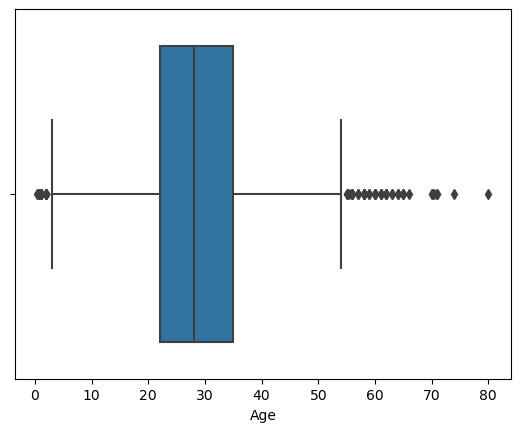

In [26]:
sns.boxplot(x="Age",data=df)

In [27]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [28]:
df.shape

(891, 11)

In [29]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female       bool
Sex_male         bool
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object

In [30]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
Y=df[["Survived"]]
X=df.drop(["Survived"],axis=1)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [34]:
model_log=LogisticRegression()

In [35]:
model_log.fit(X_train,Y_train)

LogisticRegression()

In [36]:
model_log.score(X_train,Y_train)

0.8105939004815409

In [37]:
model_log.score(X_test,Y_test)

0.7723880597014925

In [41]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import seaborn as sns

In [42]:
predictions=model_log.predict(X_test)                                

<Axes: >

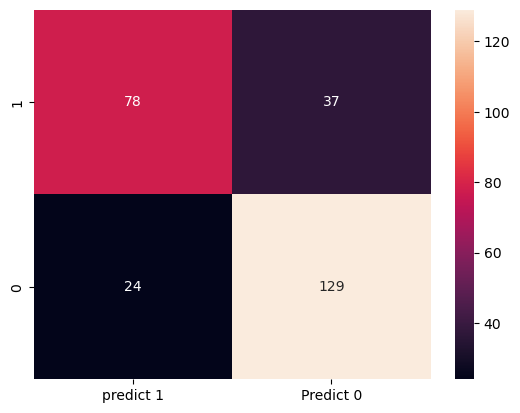

In [44]:

from sklearn import metrics
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame (cm, index = [i for i in ["1","0"]],
                    columns=[i for i in ["predict 1" , "Predict 0"]])
sns.heatmap(df_cm , annot=True, fmt='g')

In [45]:
model_log.score(X_test,Y_test)

0.7723880597014925

In [46]:
78+37+24+129

268

In [47]:
78+129

207

In [48]:
207/268

0.7723880597014925

## dataset-2(Pima diabetes dataset)

In [ ]:
df=pd.read_csv("pima-indians-diabetes-2.csv")
df.head()

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
Y=df[["class"]]
X=df.drop(["class"],axis=1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
model_log=LogisticRegression()

In [ ]:
model_log.fit(X_train,Y_train)

In [ ]:
model_log.score(X_train,Y_train)

In [ ]:
model_log.score(X_test,Y_test)